# Homework

1) Calculate and plot the ratio F(n)/F(n-1) with respect to n using memorization method.

2) 

    a) Use the Recursion method, Tabulation method,  and matrix method to calculate the time spent for different n (e.g. 1, 10, 100, 1000, 10000, … uniform in the log space). 

    b) For each method, output the time and n into a file
       
    c) Read from the file and plot log(time) (y-axis) vs. log(n) (x-axis) for different methods. 
       
    d) Discuss the complexity of each method.

In [ ]:
# memoization method stores the results of functions 
# if function repeats less time is used solving it due to storage of function 

import time # allows for time calculation and label of actual time
import numpy as np # numpy 
import pylab as p  # import Matplotlib label it as p
import matplotlib.pyplot as plt   # Load Matplotlib


# first create memoization 
# see lec3-pre notes !!!!


def fib_memo(n, table): # 'n' is input num and 'table' is storage 
    if n == 0 or n == 1:  # initial values for fibonacci sequence 
        table[n]= n      # this is telling comp to store 'n'in position 'n' within storage
    if table[n] is None:  # 'None' is specific. This is saying if 'n' not in table, store it
        table[n] = fib_memo(n-1,table) + fib_memo(n-2,table) # this calculates f[n]      
    return table[n]

# test function up to this point
# n= 10 
# table = [None]*(n+1)   # allows for correct dimensions 
# start_time = time.time()
# print('for n =', n, '; f(n)= ',fib(n, table)/fib(n-1,table)," and takes %s seconds " % (time.time() - start_time))
# correct output 

# next we are creating a function to find the ratio of f(n)/f(n-1)

def fib_ratio(n): # we are piggybacking off of the 'fib_memo' doing the calculations
    table = [None]*(n+1)  # assigning TABLE in definition keeps ruining plot, so keep definition just 'n'!!!!!
    table[0]= 0   # sets arg range
    fib_num = fib_memo(n,table) # assigning 'fib_memo' within 'fib_ratio' function
    fib_denom = table[n-1] # in memo table[n] = n so table[n-1] = n-1 
    return fib_num/fib_denom

np.seterr(divide = 'ignore')

# test function up to this point
#n= 5
#table = [None]*(n+1)   # allows for correct dimensions 
#start_time = time.time()
#print('for n =', n, '; f(n)= ',fib_ratio(n)," and takes %s seconds " % (time.time() - start_time))
# correct output 
# can't do n = 0 which probably can be accounted for somehow, TBD 



# next we create the plot components 
x_value = np.arange(1,11)  # set range 0-30
y_value = []  # this is from above definition fib_ratio 
for x in x_value:
    y_value.append(fib_ratio(x))
plt.plot(x_value,y_value)
plt.show()

# GOT ERROR '<ipython-input-1-5f8631248b13>:35: 
#RuntimeWarning: divide by zero encountered in 
#long_scalarsreturn fib_num/fib_denom'
# see- https://stackoverflow.com/questions/21610198/runtimewarning-divide-by-zero-encountered-in-log

np.seterr(divide = 'ignore') # turns off error lidted above

In [9]:
import time # allows for time calculation and label of actual time
import numpy as np # numpy 
import pylab as p  # import Matplotlib label it as p
import matplotlib.pyplot as plt   # Load Matplotlib



# tabluation method eg: saves calculations 
def table_fib(n):
    table=[0]*(n+1)
    table[1] = 1
    for i in range(2,n+1):
        table[i]= table[i-1] + table[i-2]
    return table[n]



# recusion method 
def rec_fib(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    elif (n>=2):
        return rec_fib(n-1) + rec_fib(n-2)


    
# matrix method from lec3-pre
def arrpow(arr, n): # 'arrpow' is the function!!!
    yarr=arr  # see: https://pypi.org/project/yarr/ 
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

# arrpow is just a TOOL. use it for another defined function such as
def rec_mat(n):
    arr= [[1,1],[1,0]]  # fib matrix defined - see lec3-pre for matrix in latex form
    f=arrpow(arr,n-1)[0][0]
    return f

print(rec_mat(20))

#writing file \n new line \t tab/space
def writeFile(name, n, time):
    f = open(name, "w")
    for i in range(len(n)):
        f.write(str(n[i]))
        f.write("\t")
        f.write(str(time[i]))
        f.write("\n")
    f.close()
    return


t_t = np.arange(1,100,10) # log space
time_t = [] # empty array 4 time values
for i in t_t:
    start_time = time.time() # see lec3
    table_fib(i)
    time_t = np.append(time_t,time.time()-start_time)

writeFile("table HW2.txt",t_t,time_t)

t_r = [3,5,10,30] #takes way too long for large N !!!
time_r = []
for i in t_r:
    start_time = time.time()
    rec_fib(i)
    time_r = np.append(time_r,time.time()-start_time)


writeFile("rec HW2.txt",t_r,time_r)

t_m = [2,5,10,30] #start with 2 because from def n>1 or itll throw error!!!!
time_m = []
for i in t_m:
    start_time = time.time()
    rec_mat(i)
    time_m = np.append(time_m,time.time()-start_time)

writeFile("matrix HW2.txt",t_m,time_m)

print('done')

6765
done


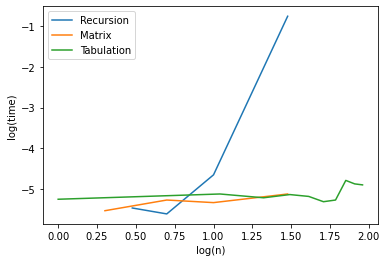

In [12]:
import time # allows for time calculation and label of actual time
import numpy as np # numpy 
import pylab as p  # import Matplotlib label it as p
import matplotlib.pyplot as plt   # Load Matplotlib


files = ["rec HW2.txt", "matrix HW2.txt", "table HW2.txt"]

#Read in n and time data files
def readFile(name):
    f = open(name, "r")
    n = []
    times = []
    for line in f:
        line = line.strip() 
        columns = line.split()
        n = np.append(n, float(columns[0]))
        times = np.append(times, float(columns[1]))
    return n, times

plt.figure()
for i in files:
    this_n, this_time = readFile(i)
    for j in range(len(this_time)):
        if this_time[j] == 0.:
            this_time[j] = 0.0000001 #many of our times register as 0 which will throw an error when we try to take log
    plt.plot(np.log10(this_n), np.log10(this_time))
plt.xlabel("log(n)")
plt.ylabel("log(time)")
plt.legend(["Recursion", "Matrix", "Tabulation"])
plt.show()

From least to most complex recursion is the worst (see time to complete). tabulation was the least anoying for throwing errors.